## **Load Data**
Load the datasets '/content/PFW_count_site_data_public_2021.csv' and '/content/PFW_2021_public.csv' into pandas DataFrames.


In [1]:
import pandas as pd

# Load the datasets
df_site = pd.read_csv('/content/PFW_count_site_data_public_2021.csv')
df_pfw = pd.read_csv('/content/PFW_2021_public.csv')

# Display the first 5 rows of df_site
print("First 5 rows of df_site:")
display(df_site.head())

# Display the first 5 rows of df_pfw
print("\nFirst 5 rows of df_pfw:")
display(df_pfw.head())

First 5 rows of df_site:


,loc_id,proj_period_id,yard_type_pavement,yard_type_garden,yard_type_landsca,yard_type_woods,yard_type_desert,hab_dcid_woods,hab_evgr_woods,hab_mixed_woods,...,numfeeders_platfrm,numfeeders_humming,numfeeders_water,numfeeders_thistle,numfeeders_fruit,numfeeders_hopper,numfeeders_tube,numfeeders_other,population_atleast,count_area_size_sq_m_atleast
0,L100016,PFW_2002,0.0,0.0,1.0,0.0,0.0,1.0,NaN,1.0,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.01
1,L100016,PFW_2003,0.0,0.0,1.0,0.0,0.0,1.0,NaN,1.0,...,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,1.0,1.01
2,L100016,PFW_2004,0.0,0.0,1.0,0.0,0.0,1.0,NaN,1.0,...,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,1.0,1.01
3,L100016,PFW_2005,0.0,0.0,1.0,0.0,0.0,1.0,NaN,1.0,...,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,1.0,1.01
4,L100016,PFW_2006,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.01



First 5 rows of df_pfw:


,loc_id,latitude,longitude,subnational1_code,entry_technique,sub_id,obs_id,Month,Day,Year,...,how_many,valid,reviewed,day1_am,day1_pm,day2_am,day2_pm,effort_hrs_atleast,snow_dep_atleast,Data_Entry_Method
0,L981010,52.129760,-122.135470,CA-BC,POSTCODE LAT/LONG LOOKUP,S83206450,OBS1092604618,3,4,2021,...,20,1,0,1,0,1,0,1.001,5.0,PFW Web 4.1.4
1,L3161698,43.832207,-123.092405,US-OR,/GOOGLE_MAP/ZOOM:18,S78031190,OBS1036509564,12,19,2020,...,11,1,0,1,1,1,1,1.001,0.0,PFW Web 4.1.4
2,L13210778,39.721470,-75.933660,US-MD,/GOOGLE_MAP/ZOOM:15,S81318993,OBS1073386105,2,13,2021,...,2,1,0,1,1,1,1,8.001,5.0,PFW Web 4.1.4
3,L13258348,42.217874,-83.672300,US-MI,/GOOGLE_MAP/ZOOM:15,S79251313,OBS1051702542,1,13,2021,...,2,1,0,1,1,1,1,4.001,0.0,PFW Web 4.1.4
4,L149639,32.749921,-79.941582,US-SC,PointMaker1.0_2,S79183993,OBS1050809672,1,11,2021,...,10,1,0,1,1,1,1,1.001,0.0,PFW Web 4.1.4


In [2]:
# Check site-level data
df_site.info()
df_site.isnull().sum()
df_site.duplicated().sum()

# Check PFW observation data
df_pfw.info()
df_pfw.isnull().sum()
df_pfw.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254355 entries, 0 to 254354
Data columns (total 62 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   loc_id                        254355 non-null  object 
 1   proj_period_id                254355 non-null  object 
 2   yard_type_pavement            185478 non-null  float64
 3   yard_type_garden              186073 non-null  float64
 4   yard_type_landsca             191338 non-null  float64
 5   yard_type_woods               186727 non-null  float64
 6   yard_type_desert              185573 non-null  float64
 7   hab_dcid_woods                204241 non-null  float64
 8   hab_evgr_woods                192665 non-null  float64
 9   hab_mixed_woods               211951 non-null  float64
 10  hab_orchard                   174756 non-null  float64
 11  hab_park                      137821 non-null  float64
 12  hab_water_fresh               207096 non-nul

np.int64(0)

## **Analyze and Merge**

The analysis and merging were partially modified based on M1, but most of the content was retained. On this basis, the following EDA and clustering analyses were completed.

In [3]:
# Rename the column PROJ_PERIOD_ID in df_pfw to proj_period_id
df_pfw = df_pfw.rename(columns={'PROJ_PERIOD_ID': 'proj_period_id'})

# Merge df_pfw and df_site on loc_id and proj_period_id
df_merged = pd.merge(df_pfw, df_site, on=['loc_id', 'proj_period_id'], how='inner')

# Print the shape of df_merged
print(f"Shape of df_merged: {df_merged.shape}")

# Display the first 5 rows of df_merged
print("First 5 rows of df_merged:")
display(df_merged.head())

# Compute and print the descriptive statistics
print("Descriptive statistics for numerical columns:")
display(df_merged.describe())

# Define feeder columns for calculations
feeder_cols = [col for col in df_merged.columns if col.startswith('numfeeders_')]

# Calculate feeding_variety for the merged dataframe
df_merged['feeding_variety'] = (
    df_merged[feeder_cols]
    .fillna(0)
    .gt(0)
    .sum(axis=1) / len(feeder_cols)
)

Shape of df_merged: (77520, 82)
First 5 rows of df_merged:


,loc_id,latitude,longitude,subnational1_code,entry_technique,sub_id,obs_id,Month,Day,Year,...,numfeeders_platfrm,numfeeders_humming,numfeeders_water,numfeeders_thistle,numfeeders_fruit,numfeeders_hopper,numfeeders_tube,numfeeders_other,population_atleast,count_area_size_sq_m_atleast
0,L981010,52.129760,-122.135470,CA-BC,POSTCODE LAT/LONG LOOKUP,S83206450,OBS1092604618,3,4,2021,...,0.0,1.0,NaN,NaN,0.0,0.0,2.0,0.0,1.0,100.01
1,L3161698,43.832207,-123.092405,US-OR,/GOOGLE_MAP/ZOOM:18,S78031190,OBS1036509564,12,19,2020,...,2.0,2.0,NaN,NaN,0.0,2.0,4.0,0.0,5001.0,375.01
2,L13210778,39.721470,-75.933660,US-MD,/GOOGLE_MAP/ZOOM:15,S81318993,OBS1073386105,2,13,2021,...,0.0,2.0,NaN,NaN,0.0,3.0,3.0,0.0,5001.0,100.01
3,L13258348,42.217874,-83.672300,US-MI,/GOOGLE_MAP/ZOOM:15,S79251313,OBS1051702542,1,13,2021,...,1.0,0.0,NaN,NaN,0.0,1.0,2.0,0.0,5001.0,100.01
4,L149639,32.749921,-79.941582,US-SC,PointMaker1.0_2,S79183993,OBS1050809672,1,11,2021,...,1.0,1.0,NaN,NaN,8.0,1.0,3.0,3.0,25001.0,375.01


Descriptive statistics for numerical columns:


,latitude,longitude,Month,Day,Year,how_many,valid,reviewed,day1_am,day1_pm,...,numfeeders_platfrm,numfeeders_humming,numfeeders_water,numfeeders_thistle,numfeeders_fruit,numfeeders_hopper,numfeeders_tube,numfeeders_other,population_atleast,count_area_size_sq_m_atleast
count,77520.000000,77520.000000,77520.000000,77520.000000,77520.000000,77520.000000,77520.000000,77520.000000,77520.000000,77520.000000,...,76475.000000,76404.000000,0.0,0.0,76088.000000,77008.000000,77074.000000,76137.000000,77271.000000,77289.000000
mean,40.666635,-87.155226,5.121543,16.162977,2020.700658,3.740777,0.993060,0.003651,0.918318,0.803393,...,0.795554,0.615531,NaN,NaN,0.135777,1.219873,2.156486,0.515466,26976.967698,136.282445
std,4.610051,16.056334,4.350601,8.587562,0.457973,7.083785,0.083018,0.060311,0.273882,0.397435,...,1.107635,1.150570,NaN,NaN,0.634256,1.428017,1.858757,0.962985,36863.922848,137.122473
min,-33.137551,-157.949318,1.000000,1.000000,2020.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.010000
25%,38.259370,-93.382027,2.000000,9.000000,2020.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,NaN,NaN,0.000000,0.000000,1.000000,0.000000,1.000000,1.010000
50%,41.067451,-80.643033,3.000000,16.000000,2021.000000,2.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,NaN,NaN,0.000000,1.000000,2.000000,0.000000,5001.000000,100.010000
75%,43.307920,-76.164940,11.000000,23.000000,2021.000000,4.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,NaN,NaN,0.000000,2.000000,3.000000,1.000000,25001.000000,100.010000
max,64.933982,81.826172,12.000000,31.000000,2021.000000,500.000000,1.000000,1.000000,1.000000,1.000000,...,31.000000,32.000000,NaN,NaN,56.000000,15.000000,41.000000,15.000000,100001.000000,375.010000


## **Milestone 2: Feeding Strategy Segmentation**

Building upon the merged dataset created in M1, this phase refocuses analysis on site-level feeding strategy segmentation. While the merged data is suitable for exploratory research, observational data must be re-aggregated in the second quarter.

In [4]:
tmp = df_merged.copy()
feeder_cols = [col for col in tmp.columns if col.startswith('numfeeders_')]
month_cols = [col for col in tmp.columns if col.startswith('fed_in_')]

tmp['feeding_intensity'] = tmp[feeder_cols].fillna(0).sum(axis=1)
tmp['feeding_diversity'] = tmp[feeder_cols].fillna(0).gt(0).sum(axis=1)
tmp['feeding_consistency'] = tmp[month_cols].fillna(0).gt(0).sum(axis=1)

site_period = (
    tmp.groupby(['loc_id', 'proj_period_id'])
       .agg(**{
           'feeding_intensity': ('feeding_intensity', 'mean'),
           'feeding_diversity': ('feeding_diversity', 'mean'),
           'feeding_variety': ('feeding_variety', 'mean'),
           'feeding_consistency': ('feeding_consistency', 'mean'),
           'avg_bird_count': ('how_many', 'mean'),
           'n_checklists': ('obs_id', 'nunique'),
           'avg_effort_hrs': ('effort_hrs_atleast', 'mean')
       })
       .reset_index()
)


print("")
display(site_period.head())

,loc_id,proj_period_id,feeding_intensity,feeding_diversity,feeding_variety,feeding_consistency,avg_bird_count,n_checklists,avg_effort_hrs
0,L100032,PFW_2021,11.0,6.0,0.545455,12.0,2.375000,8,1.001000
1,L100057,PFW_2021,13.0,6.0,0.545455,12.0,4.071429,14,3.143857
2,L10007061,PFW_2021,4.0,3.0,0.272727,12.0,2.166667,6,1.001000
3,L10011987,PFW_2021,9.0,4.0,0.363636,12.0,4.200000,10,2.501000
4,L100209,PFW_2021,4.0,4.0,0.363636,12.0,3.000000,7,1.858143


Checklist-level data were aggregated to the site–period level so that each row represents a site’s overall feeding behavior within a project period. Feeding intensity, diversity, and consistency were summarized using mean values, while checklist count and effort were retained as descriptive measures of participation.

In [5]:
features = ['feeding_intensity','feeding_diversity','feeding_consistency']
site_period[features].isna().mean()

,0
feeding_intensity,0.0
feeding_diversity,0.0
feeding_consistency,0.0


All three feeding dimensions have no missing values after aggregation.

##**EDA & Preprocessing: Updates**
This section updates exploratory data analysis (EDA) and preprocessing steps to enhance interpretability of foraging behavior variables. Log-transforming foraging intensity reduces skewness, while updated visualization methods explore distributions and correlations of key variables. These steps prepare data for clustering analysis by highlighting heterogeneity in foraging behavior.

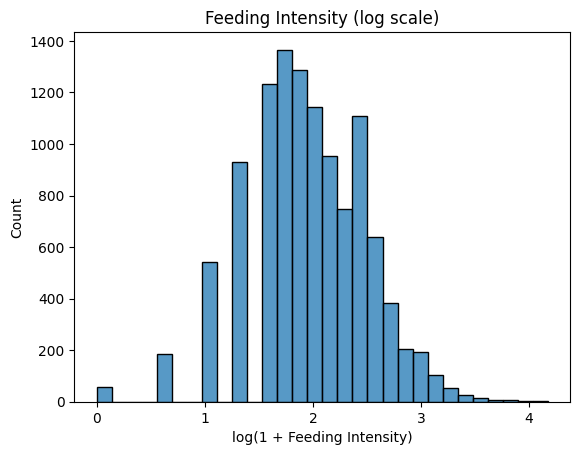

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

site_period['intensity_log'] = np.log1p(site_period['feeding_intensity'])
sns.histplot(site_period['intensity_log'], bins=30)
plt.title("Feeding Intensity (log scale)")
plt.xlabel("log(1 + Feeding Intensity)")
plt.show()

In the original data, most sites exhibited relatively low feeding intensity, but a few sites fed extremely frequently, causing most observations to cluster together and obscuring the overall pattern. Therefore, I applied a log(1 + x) transformation. This compressed the scale of high-intensity feeding values while preserving the relative differences between low-intensity feedings. The transformed distribution is more concentrated (with values roughly between 1.5 and 2.5), closer to symmetry, and easier to visualize and analyze further.

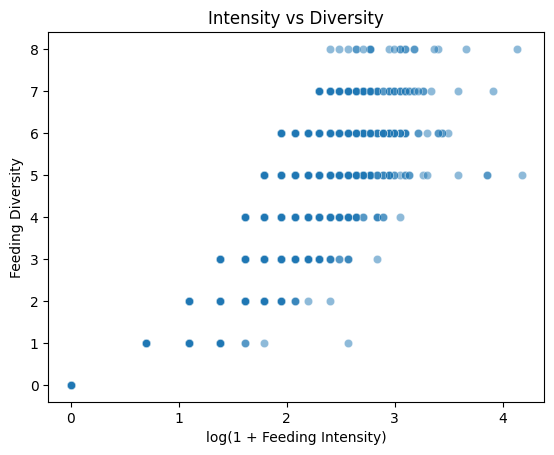

In [7]:
import numpy as np

site_period['intensity_log'] = np.log1p(site_period['feeding_intensity'])

sample_df = site_period.sample(
    min(2000, len(site_period)),
    random_state=40
    )

sns.scatterplot(
     data=sample_df,
    x='intensity_log',
    y='feeding_diversity',
    alpha=0.5
)
plt.title("Intensity vs Diversity")
plt.xlabel("log(1 + Feeding Intensity)")
plt.ylabel("Feeding Diversity")
plt.show()


This scatter plot illustrates the relationship between feeding intensity (log-transformed) and feeding diversity across different locations and time periods. Based on the chart, I observe a positive correlation. Locations with higher feeding intensity tend to have a greater variety of feeders. At similar intensity levels, feeding diversity may show significant variation, indicating distinct bird-feeding practices across different sites. The horizontal dispersion reflects that feeder diversity is an integer-counting behavior. This suggests feeding behavior is not random but follows groupable strategic patterns.

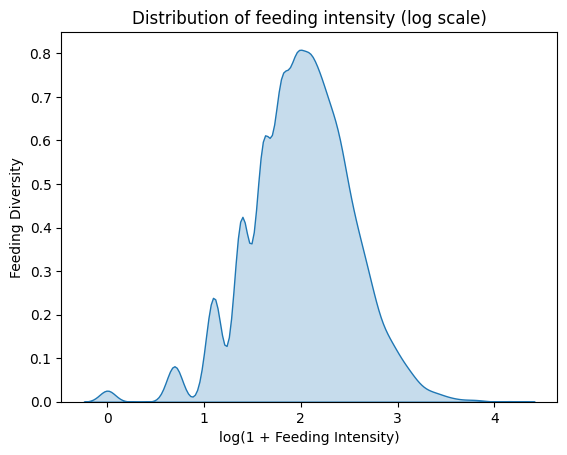

In [8]:
sns.kdeplot(
    site_period['intensity_log'],
    fill=True
)
plt.title("Distribution of feeding intensity (log scale)")
plt.xlabel("log(1 + Feeding Intensity)")
plt.ylabel("Feeding Diversity")
plt.show()

Feeding intensity exhibits a strongly right-skewed distribution, even after aggregation to the site–period level. A log transformation reveals a smooth distribution with substantial variation across sites, supporting its use as a continuous clustering dimension.

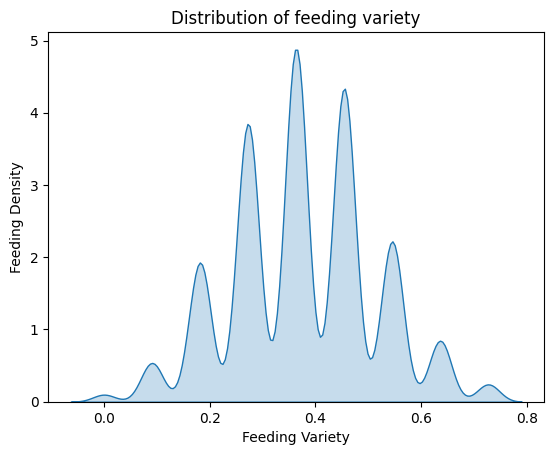

In [9]:
sns.kdeplot(
    site_period['feeding_variety'],
    fill=True
)
plt.title("Distribution of feeding variety")
plt.xlabel("Feeding Variety")
plt.ylabel("Feeding Density")
plt.show()

When values in the KDE plot approach 0, few feeder types are utilized. Conversely, values near 1 indicate the use of many different feeder types. Observing multiple peaks rather than a single peak pattern in this plot suggests that locations tend to cluster around several typical levels of feeder diversity. Most sites exhibit moderate foraging diversity, while a minority rely on either very few or an extremely wide variety of feeder types. I believe this pattern indicates heterogeneity in foraging behavior and motivates us to employ cluster analysis to identify distinct foraging strategies.

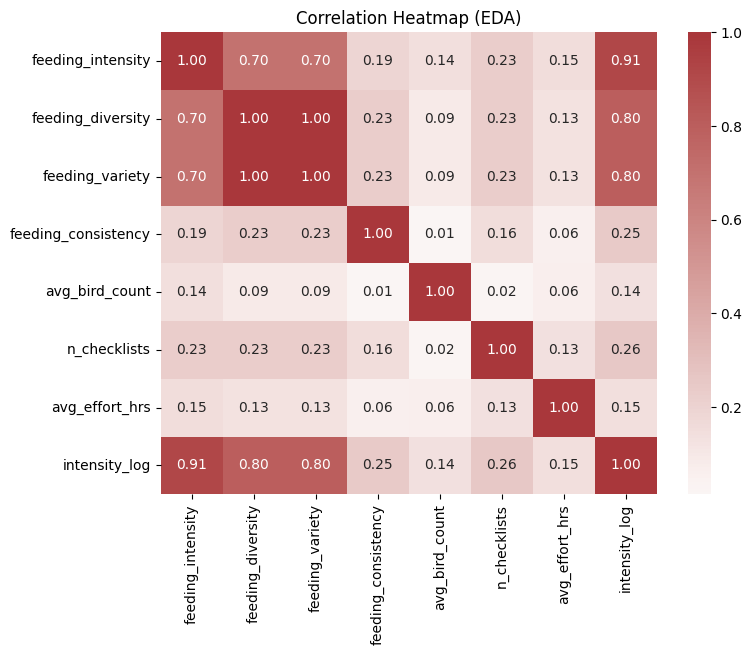

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = site_period.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    cmap="vlag",
    center=0,
    annot=True,
    fmt=".2f"
)

plt.title("Correlation Heatmap (EDA)")
plt.show()

This heatmap reveals linear relationships between feeding behavior variables and observed control variables. I observed strong positive correlations among feeding_intensity, feeding_diversity, and feeding_variety, indicating that areas with more intensive feeding activity tend to employ richer feeding strategies.

In contrast, feeding consistency exhibits weaker correlations with other feeding variables, suggesting that feeding stability represents a relatively independent behavioral dimension. This supports treating it as a distinct feature in subsequent clustering analyses.

Overall, this heatmap confirms the absence of severe multicollinearity among variables while validating the effectiveness of these foraging indicators in distinguishing different foraging strategy types.

## **Cluster Analysis**
In this section, I will employ cluster analysis to identify distinct feeding behavior patterns across different locations. Using Ward's method for hierarchical clustering, I will analyze standardized feeding characteristics to explore naturally occurring groupings within the data. The resulting clusters will reflect the heterogeneity of feeding strategies and help explain variations between locations.

**Hierarchical**

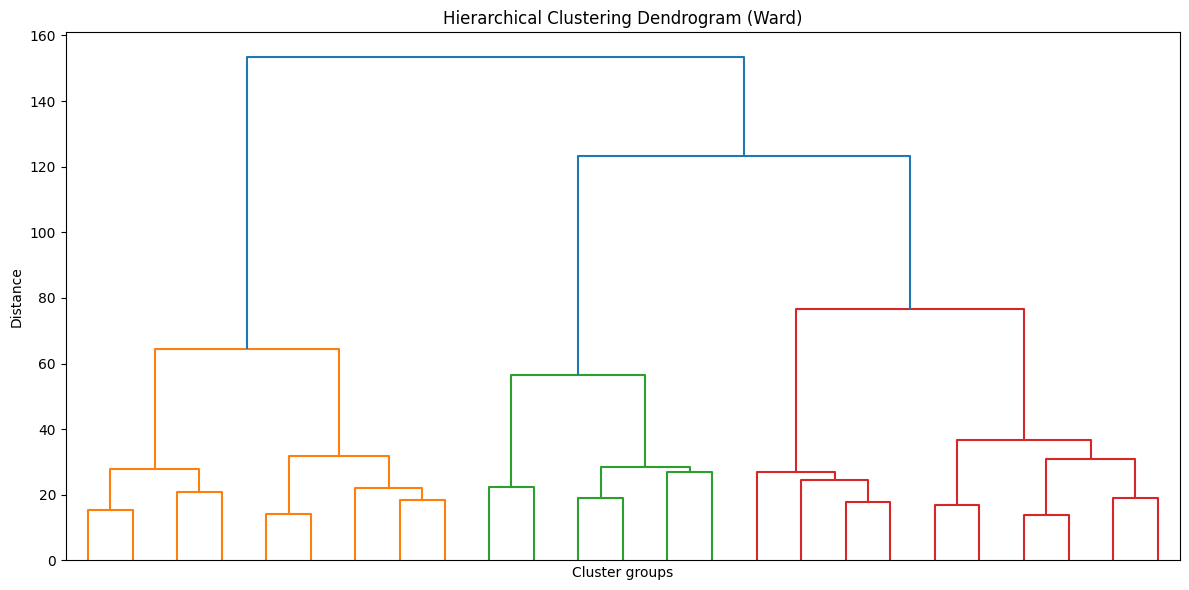

In [11]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler

features = ['intensity_log', 'feeding_variety', 'feeding_consistency']

X = site_period[features].dropna()
X_scaled = StandardScaler().fit_transform(X)

Z = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(
    Z,
    truncate_mode='lastp',
    p=25,
    show_leaf_counts=False,
    no_labels=True
)

plt.title("Hierarchical Clustering Dendrogram (Ward)")
plt.ylabel("Distance")
plt.xlabel("Cluster groups")
plt.tight_layout()
plt.show()


In [12]:
from scipy.cluster.hierarchy import fcluster

cluster_labels_h = fcluster(Z, 3, criterion='maxclust')
pd.Series(cluster_labels_h).value_counts()

,count
1,4929
2,3997
3,2267


**K-means**

In [13]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for k in [2, 3, 4, 5, 6, 7, 8]:
    labels = KMeans(k, random_state=42).fit_predict(X_scaled)
    print(k, silhouette_score(X_scaled, labels))

2 0.38196460215457106
3 0.41748162010499695
4 0.42147630035418865
5 0.3865853874755081
6 0.3651351401501449
7 0.3388637920915682
8 0.35301733805470775


In [23]:
print("Seed | Silhouette | Inertia")

for seed in [0, 10, 20, 30, 40, 50]:
    model = KMeans(n_clusters=3, random_state=seed, n_init=50)
    labels = model.fit_predict(X_scaled)

    score = silhouette_score(X_scaled, labels)
    inertia = model.inertia_

    print(seed, "|", round(score,4), "|", round(inertia,2))


Seed | Silhouette | Inertia
0 | 0.4182 | 13074.59
10 | 0.4182 | 13074.59
20 | 0.4182 | 13074.59
30 | 0.4182 | 13074.59
40 | 0.4182 | 13074.59
50 | 0.4182 | 13074.59


In [15]:
for seed in [0, 10, 20, 30, 40, 50]:
    model = KMeans(n_clusters=3, random_state=seed, n_init=50)
    labels = model.fit_predict(X_scaled)

    print(f"\nSeed {seed} cluster sizes:")
    print(pd.Series(labels).value_counts().sort_index())


Seed 0 cluster sizes:
0    4423
1    5020
2    1750
Name: count, dtype: int64

Seed 10 cluster sizes:
0    5020
1    4423
2    1750
Name: count, dtype: int64

Seed 20 cluster sizes:
0    5020
1    4423
2    1750
Name: count, dtype: int64

Seed 30 cluster sizes:
0    5020
1    4423
2    1750
Name: count, dtype: int64

Seed 40 cluster sizes:
0    4423
1    5020
2    1750
Name: count, dtype: int64

Seed 50 cluster sizes:
0    4423
1    5020
2    1750
Name: count, dtype: int64


In [16]:
baseline_model = KMeans(n_clusters=3, random_state=42, n_init=50)
baseline_model.fit(X_scaled)

print("Cluster centers (scaled):")
print(baseline_model.cluster_centers_)

Cluster centers (scaled):
[[-0.62956816 -0.70574767  0.41667423]
 [ 0.76715624  0.82922661  0.35347495]
 [-0.60945392 -0.59496892 -2.0670825 ]]


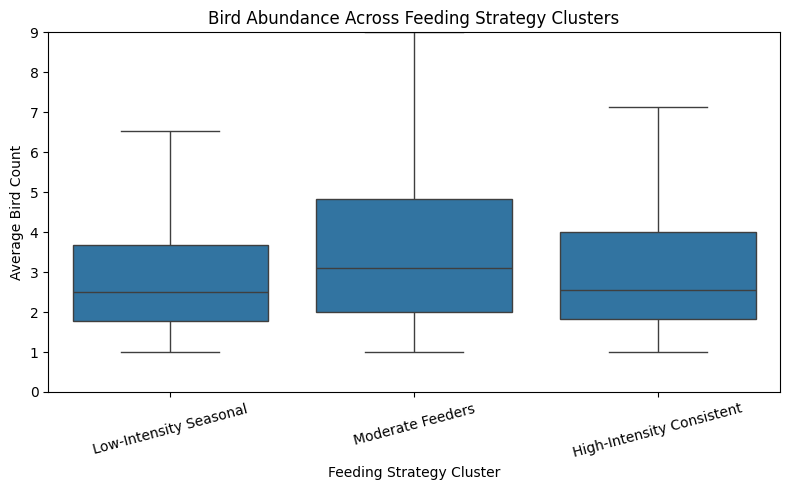

In [17]:
cluster_names = {
    0: "Low-Intensity Seasonal",
    1: "Moderate Feeders",
    2: "High-Intensity Consistent"
}
site_period['cluster'] = baseline_model.labels_
site_period['cluster_label'] = site_period['cluster'].map(cluster_names)

order = ["Low-Intensity Seasonal",
         "Moderate Feeders",
         "High-Intensity Consistent"]

plt.figure(figsize=(8,5))
sns.boxplot(
    data=site_period,
    x='cluster_label',
    y='avg_bird_count',
    order = order,
    showfliers=False
)

plt.ylim(0, site_period['avg_bird_count'].quantile(0.95))
plt.xlabel("Feeding Strategy Cluster")
plt.ylabel("Average Bird Count")
plt.title("Bird Abundance Across Feeding Strategy Clusters")

plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [24]:
from scipy.stats import kruskal

group0 = site_period[site_period['cluster'] == 0]['avg_bird_count']
group1 = site_period[site_period['cluster'] == 1]['avg_bird_count']
group2 = site_period[site_period['cluster'] == 2]['avg_bird_count']

H_stat, p_value = kruskal(group0, group1, group2)

print("H-statistic:", round(H_stat,4))
print("p-value:", p_value)

H-statistic: 329.9994
p-value: 2.1955676261407997e-72


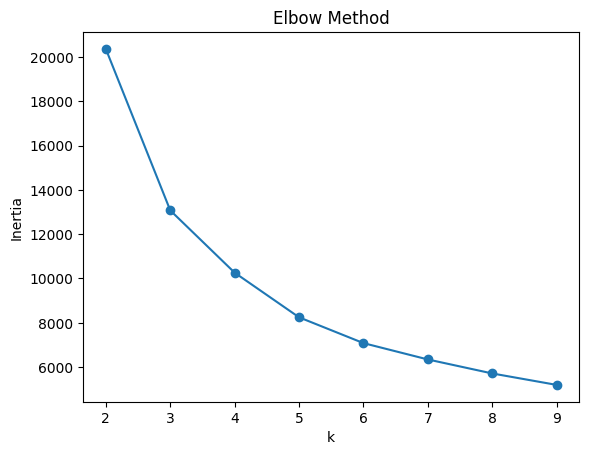

In [19]:
inertias = []

for k in range(2, 10):
    model = KMeans(n_clusters=k, random_state=42, n_init=50)
    model.fit(X_scaled)
    inertias.append(model.inertia_)

plt.plot(range(2,10), inertias, marker='o')
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()



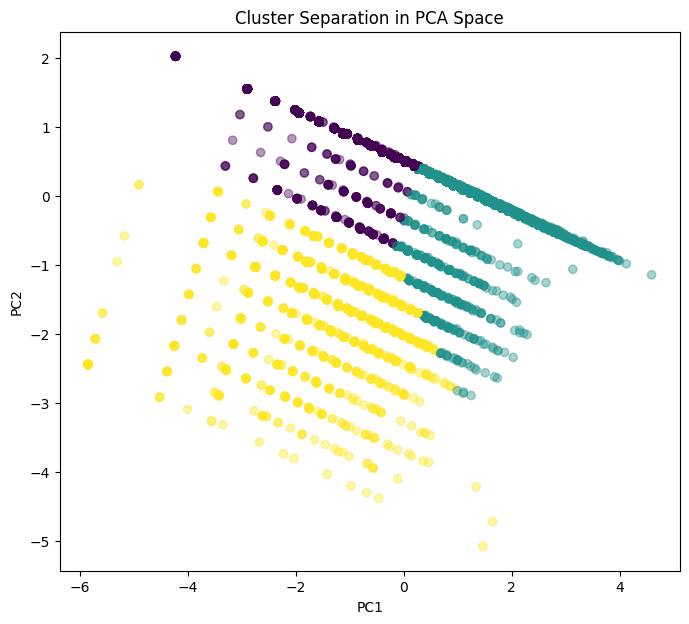

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,7))
plt.scatter(X_pca[:,0], X_pca[:,1],
            c=baseline_model.labels_,
            alpha=0.4)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Cluster Separation in PCA Space")
plt.show()
